In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
from datetime import datetime, timedelta
import plotly.io as pio
import statsmodels.api as sm
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
# !pip3 install psutil requests
# ! pip install -U kaleido
#!pip install linearmodels

# Research Question: What are the Relations between US Startup Firms’ Characteristic and Total Funding?

# Part 1: Introduction

During the 21th century, the growth and development of startup firms served as an engine of economic growth. Initially, startup firms infuse capital and new ideas to create job opportunities.  There are at least a half million startup firms emerge every year in the United States, which is a huge injection of productive human capital into the economy. Apart from job creation, startup firms also provide innovative products or services to the economy(Ying, 2009).

As startup firms become prosper, there are existed studies that examine the strategies of successful startups and characteristic that support firms’ growth. For instance, study shows that the innovative and global startups which have internationalization strategies and innovative network is becoming a major new type of firm in global market(Erik and Stoyan, 2015). Company types and amount of funding affects the intensity of employee growth of startups(Antonio, 2003). These studies point out the the popularity of startups and importance of conducting analysis on them.

However, there are only few studies on characteristic and funding of startups. It is important to understand funding since funding is an essential part of the startup’s development. There are many potential features that could impact total funding, and it is worthwhile to find out whether the proposed factors affect total funding or not, and how significant are the relations. This project will investigate distribution of total funding based on different categorical variables including operating status, categories, and US states. The project also uses bivariate and multivariate linear regression models and machine learning as a prediction of total funding based on numerical variables and compare these regression models. 

Throughout the project, the independent variable Xs are status, category, location, investment rounds, funding rounds, milestones, and relationships. The dependent variable Y is the total funding in USD for startups. To be more specific, status, category, and location are categorical variables. There are 7 types of startups’ status and 42 categories of the startup firms.  The discussion focuses on US states as location variable. Investment rounds, funding rounds, milestones, and relationships are numerical variables. With following analysis, we will have deeper insights about distributions of total funding and effects of characteristic on startup’s funding. 

The data used in this paper can be found at from Kaggle website and can be found through the link: https://www.kaggle.com/justinas/startup-investments. This diverse dataset contains information about the startup ecosystem: organizations, individuals, company news, funding rounds, acquisitions, and IPOs. There are 11 tables that can be joined using unique IDs and all the data are from 2013. The main dataset used in the paper is “objective” dataset. 

Data of median income level from 2010 to 2019 and annul growth rate are scraping from the website: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income. We also refer to our ideal website for future data scraping: https://www.linkedin.com/pulse/linkedin-top-startups-2020-50-us-companies-rise-jessi-hempel/

The level of observation is individual startup firm so the analysis is conducted based on characteristic of individual startup firm.

The final project contains four parts: Introduction, previous project, OLS regression and machine learning.

# Part 2: Previous Project

# Project 1

In [55]:
#1. read the file and convert it into dataframe
df = pd.read_csv("objects.csv") 
df = pd.DataFrame(df)

#2. summary statistics of x-variable status and plot 
status_count = df['status'].value_counts()
percentage_status=status_count/status_count.sum()*100

This step reads the dataset from "objects.csv" and saved it as a dataframe called "df". By reading the data and converting the dataset into a dataframe, it's easier to extract and analze the data later in the project. Then we summarises the percentage of status for all startup firms.

<AxesSubplot:title={'center':'percentage of startups in each status'}, xlabel='status', ylabel='percentage'>

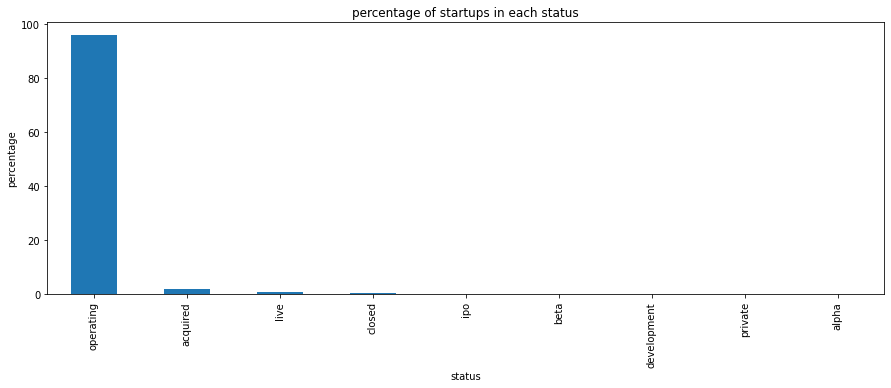

In [107]:
percentage_status.plot(
    kind='bar',
    figsize = (15,5),
    xlabel = "status",
    ylabel = "percentage",
    title ="percentage of startups in each status")

The summary statistics and bar plot gives distribution of the first independent varibale, the status of startups. Specifically, the plot information about percentage of each status in the market. We can see from the plot that firms with “operating” status are mostly dominant the market, with about 96 percent of the market. There are almost no firms with status of "ipo", "beta", "development", "private", and "alpha".

In [57]:
#2. summary statistics of x-variable category and plot
category_count = df['category_code'].value_counts()
percentage_category = category_count/category_count.sum()*100

<AxesSubplot:title={'center':'percentage of startups in each category'}, xlabel='category', ylabel='percentage'>

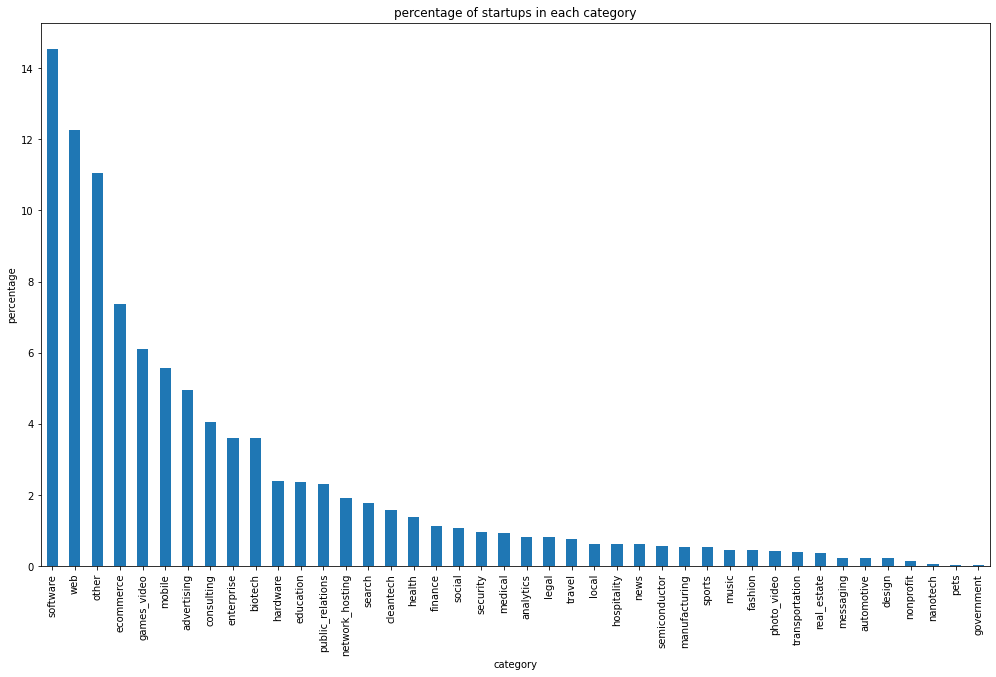

In [58]:
percentage_category.plot(kind='bar',
                         figsize = (17,10),
                         xlabel = "category",
                         ylabel = "percentage",
    title ="percentage of startups in each category")

The summary statistics and bar plot above gives distribution of the second independent varibale, the category of startups. Specifically, the plot information about percentage of each category in the market. We can see from the plot that software startups are the most in the market, with about 14.5 percent of the market. In contrast, "governemnt" startups are the rarest in the market, with only 0.03 percent. 

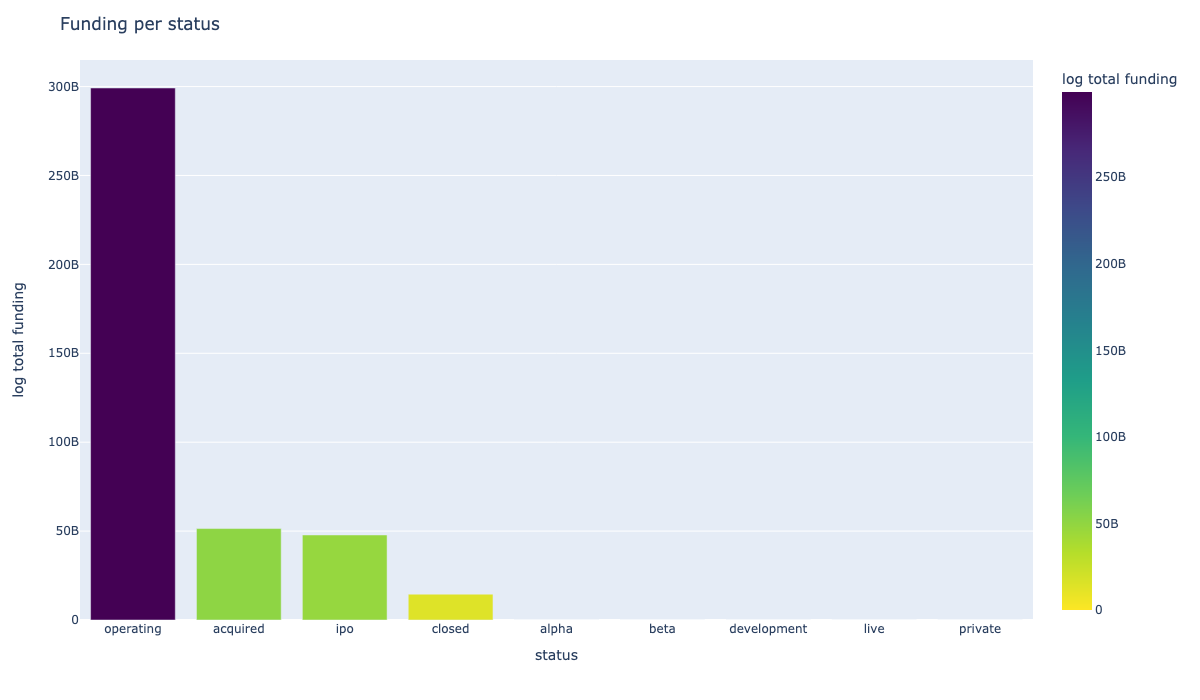

In [59]:
#3. Plot relation between x variables and y variable

# plot relation between first x variable and y variable
objects=pd.read_csv("objects.csv")
funding_status = objects.loc[:,
                            ["status", 
                            "funding_total_usd"]
                            ].groupby("status")

funding_status = funding_status.sum().sort_values(
    ["funding_total_usd"], ascending = False).reset_index()

fig = px.bar(funding_status, x="status", y="funding_total_usd", 
             color='funding_total_usd', 
             color_continuous_scale='Viridis_r',
             labels={"funding_total_usd": "log total funding"})
fig.update_layout(
    title_text = 'Funding per status')

image_bytes = fig.to_image(format='png', width=1200, height=700, 
                           scale=1)
from IPython.display import Image
Image(image_bytes)

The figure above plots the distribution between firms’ status and firms’ total funding in US dollars. We can see that operating firms receive the most of funding, which is about 300 Billions in total while firms with status of “alpha”, “beta”, “development”, “live”, and “private” receive very few fundings. It’s interesting to find that “ipo” and “closed” firms are rank on third and fourth respectively although there are very few numbers of them.  

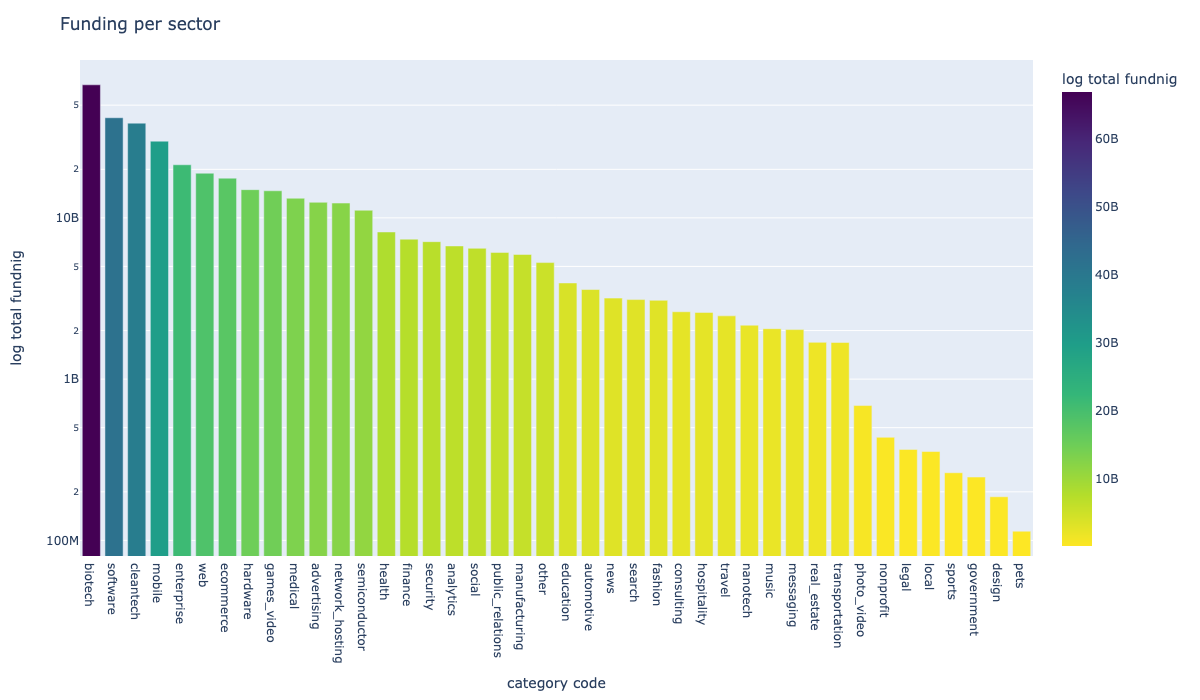

In [60]:
#plot relation between second x variable and y variable
funding_category = objects.loc[:, ["category_code", 
    "funding_total_usd"]].groupby("category_code")

funding_category = funding_category.sum().sort_values(
    ["funding_total_usd"], 
    ascending = False).reset_index()

fig = px.bar(funding_category, x="category_code", 
             y="funding_total_usd", 
             color='funding_total_usd', 
             color_continuous_scale='Viridis_r',
             labels={"funding_total_usd":"log total fundnig",
                     "category_code":"category code"})
fig.update_layout(title_text = 'Funding per sector')
fig.update_yaxes(type="log")

image_bytes = fig.to_image(format='png', width=1200, 
                           height=700, scale=1)
from IPython.display import Image
Image(image_bytes)

The above figure provides information about relations between firms’ category and total funding. From the figure, biotech firms receive the most funding, with about 67 billion dollars, while pets firms receive the least amount of funding. We can conclude that industries related to technology including biotech, software, and clean tech received more funding compared to other types of firms.

# Project 2:

# Main message and plot:
Among all the subjects, startups with operating status and software category have the highest proportion, and operating startups and biotech startups receive the most total fundings. Investigating on location, California state has the most startup companies, receive the most total funding, has the highest annual growth rate from 2010 to 2019, and has the highest median income in 2019, which lead our conclusion that California has the best growing environment for startup firms.

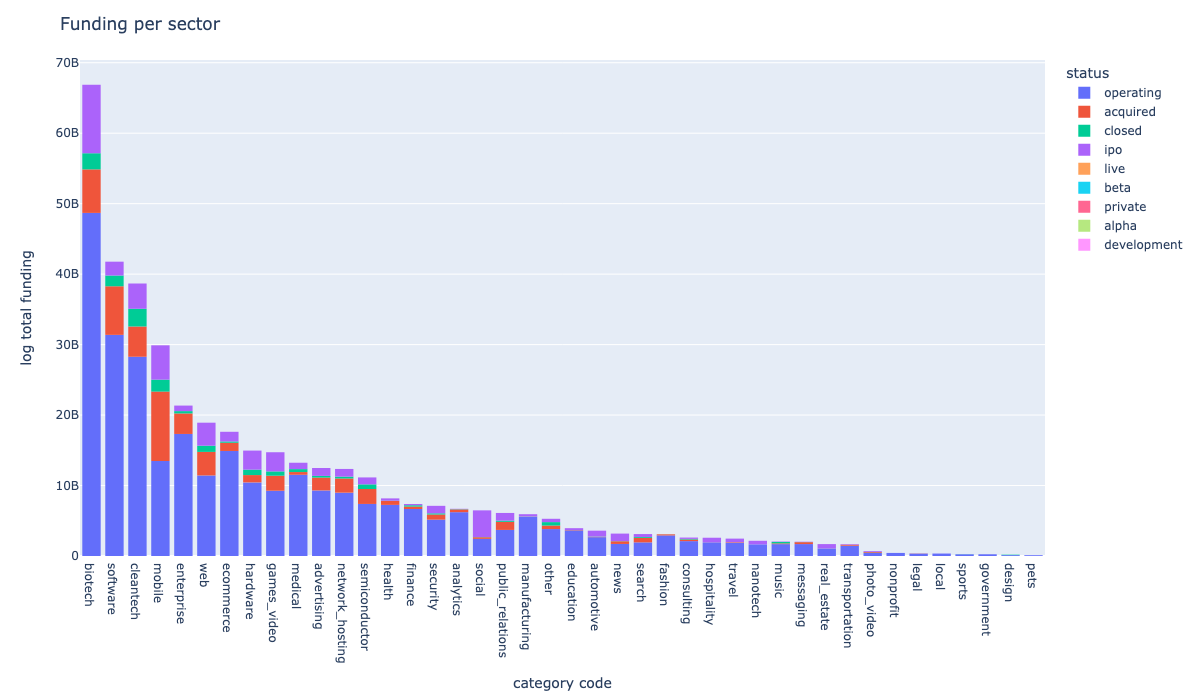

In [61]:
# main plot:
fig = px.histogram(df, x="category_code", y="funding_total_usd", 
             color="status",
             labels={"sum of funding_total_usd":"log total funding",
                     "category_code":"category code"})
fig.update_layout(
    title_text = 'Funding per sector',
    yaxis = dict(title = 'log total funding'))
fig.update_xaxes(categoryorder="total descending")

image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1)
from IPython.display import Image
Image(image_bytes)

To summarize distribution of total funding based on status and category in one plot, a stacked histogram is more informative. This histogram above shows the total funding of each category under different status. For all categories, startups under "operating" status receive the most funding, following "acquired" and "ipo" startups in different categories. Specifically, biotech, mobile, and clean startups receive are the top three companies that receive most funding from IPO. Comparing to other categories, these companies tend to raise capital by issuing shares of stock, or equity, in a public market. Mobile, software, and biotech companies are the top three companies that receive most funding from acquired round, meaning that they received funding from merging with other companies. Looking at the market, we can also conclude that almost startups for all categories receive very few funding under "live", "beta", "private", "alpha", and "development" status, due to only small amount of firms go into these status.

In all, through this stacked bar plot, we can better understand the how the total funding is distributed in different category under different statuses.

# Map of X and Y variables

In [62]:
# map of Y variable 
objects = pd.read_csv("objects.csv")
funding_state = objects.loc[:, ["state_code", 
                                "funding_total_usd"]
                           ].groupby("state_code")
funding_state = funding_state.sum().sort_values(
                ["funding_total_usd"], 
                ascending = False).reset_index()
funding_state.head()

,state_code,funding_total_usd
0,CA,1.377559e+11
1,NY,3.115670e+10
2,MA,2.946294e+10
3,WA,1.528665e+10
4,TX,1.455177e+10


The funding_state summary statistics provides information about total amount of funding in each states in the United States. For simplicity, only top 10 rows are shown above.

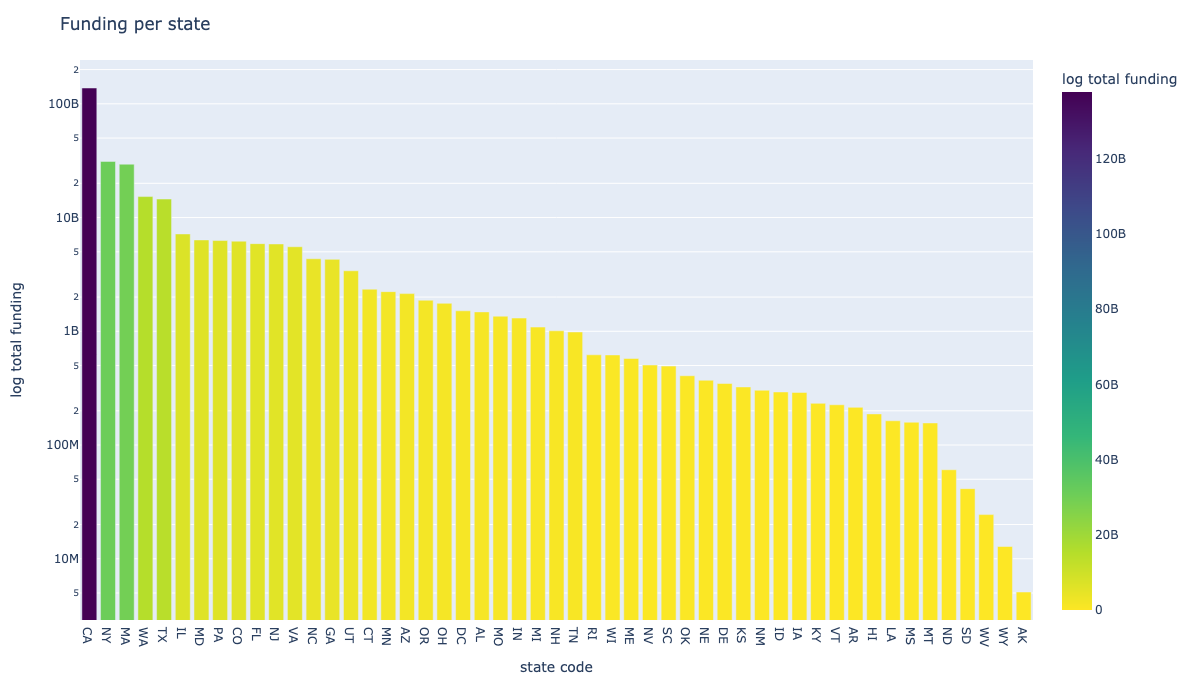

In [63]:
fig = px.bar(funding_state, x="state_code", y="funding_total_usd", 
             color='funding_total_usd', 
             color_continuous_scale='Viridis_r',
             labels={"funding_total_usd":"log total funding",
                     "state_code":"state code"})
fig.update_layout(title_text = 'Funding per state')
fig.update_yaxes(type="log")

image_bytes = fig.to_image(format='png', width=1200, height=700, 
                           scale=1)
from IPython.display import Image
Image(image_bytes)

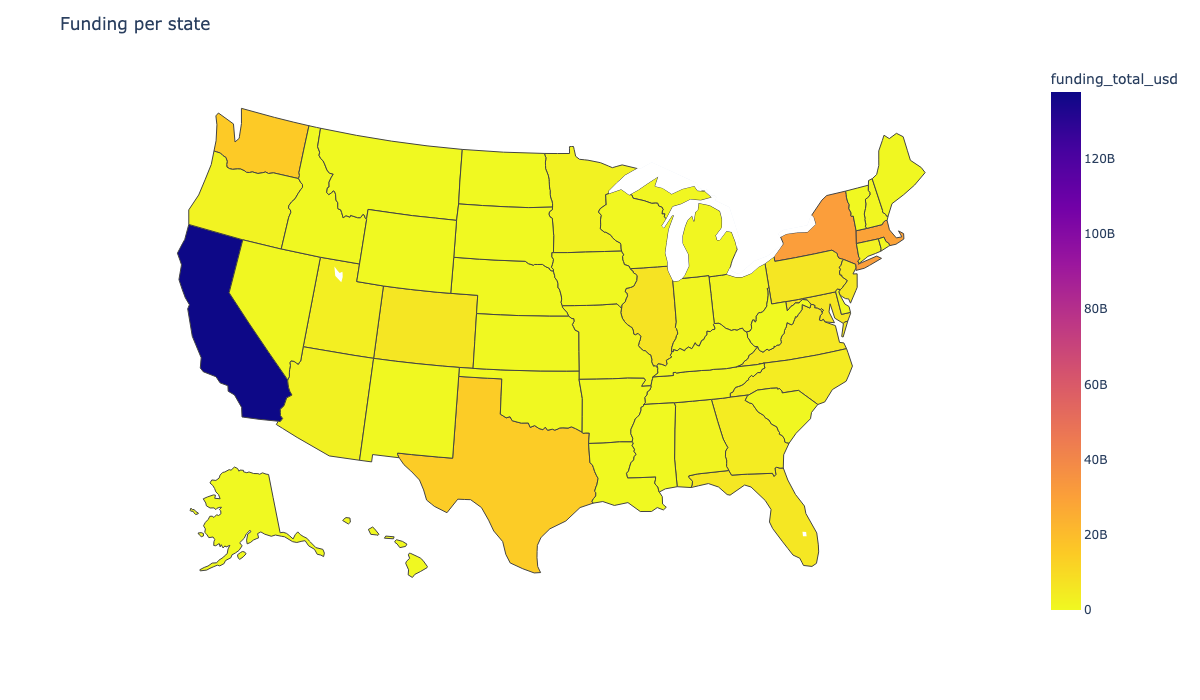

In [64]:
fig = px.choropleth(funding_state,  # Input Pandas DataFrame
                    locations="state_code",  
                    color="funding_total_usd", 
                    hover_name="state_code", 
                    color_continuous_scale='plasma_r', 
                    locationmode = 'USA-states') 
                    # set USA as location 
fig.update_layout(
    title_text = 'Funding per state', 
    geo_scope='usa')

image_bytes = fig.to_image(format='png', width=1200, 
                           height=700, scale=1)
from IPython.display import Image
Image(image_bytes)

The figure shows the total amount of funding in each states. Total funding in California is the highest among all the states, which is about 138 billion dollars. The five states that receive the most fundings are California, New York, Massachusetts, Washington, and Texas respectively. The state of California receives the most total funding, much more than other states. This may due to the existence of Silicon Valley that contains many high-tech startups. Also, these five states are costal states that are more open for international trading. More international trading results in more net exports, which is a good sign of more profits from international business. This explains why these states receive the most fundings.

In [65]:
# map of distribution of startup firms
percentage_state=pd.DataFrame()
states = objects[objects["state_code"
                         ].notna()]["state_code"].unique()
states.sort(axis=0)

values = list(objects[objects["state_code"
].notna()]["state_code"].value_counts(
normalize="True").sort_index()*100)

percentage_state["state_code"] = states
percentage_state["percentage"] = values
percentage_state.head()

,state_code,percentage
0,AK,0.029218
1,AL,0.359752
2,AR,0.173484
3,AZ,1.442659
4,CA,32.025201


The data frame percentage_state above summarises the percentage of firms in each states. For simplicity, only top 10 rows are shown above.

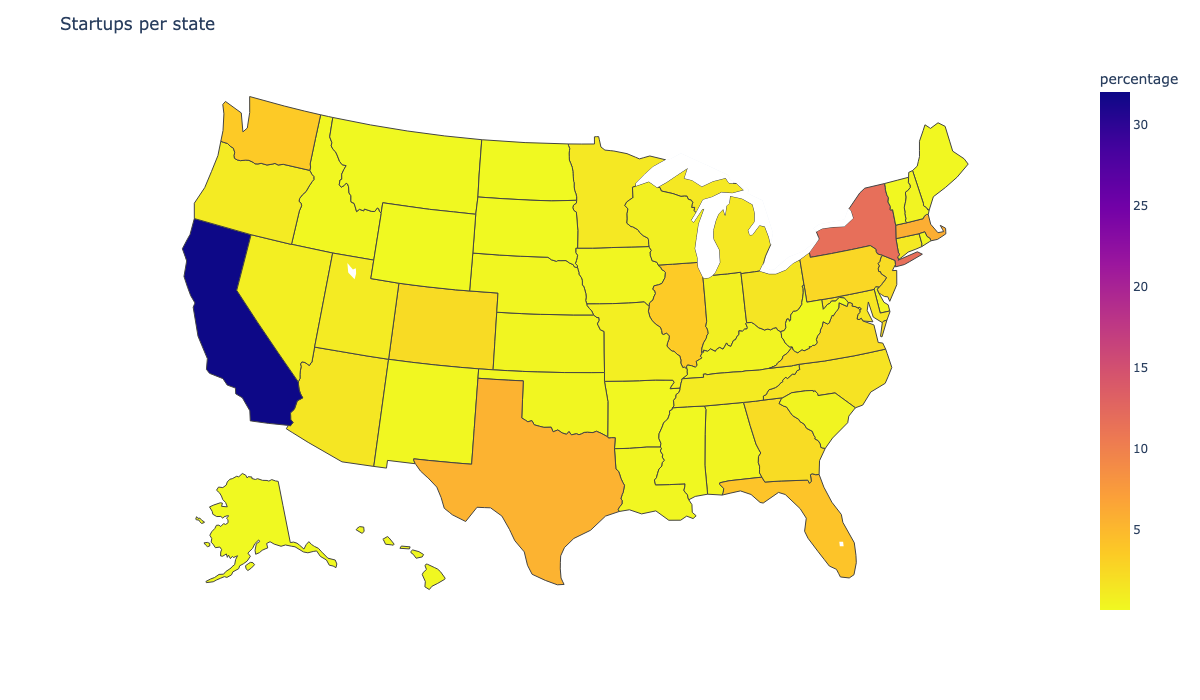

In [66]:
fig = px.choropleth(percentage_state,  
                    locations="state_code",  
                    color="percentage",  
                    hover_name="state_code", 
                    color_continuous_scale='plasma_r', 
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'Startups per state', 
    geo_scope='usa',  
)

image_bytes = fig.to_image(format='png', width=1200, 
                           height=700, scale=1)
from IPython.display import Image
Image(image_bytes)

The map above shows the percentage of startups in each state. The five states that have highest number of startups are California, New York, Massachusetts, Texas, and Florida respectively. However, the number of firms in most of the states are well-proportioned distributed. Comparing the distribution of percentage of startups in each state and the distribution of total funding in each state in the previous map, we can see that the top three states with most startups receive the most fundings, but most of the states have well-proportioned number of startups and fundings. 

# Project 3
2.1

(1)
The website that I choose summarises 2020 LinkedIn Top Startups list which reveals the 50 young, resilient companies where America wants to work. Specifically, the website shows basic information including headcount, headquarters, year founded, most common skills, largest job functions of the top 50 startup companies in the US. This new data can give useful information about the characteristics of startup companies that people want to work. Then we can know more about popular startups' characteristics for further prediction. This website has strong linkage with my previously used dataset because companies in this website are more focused and it provides more characteristic of the firm. We can compare and contrast between this new data and original dataset and choose the most useful parts to merge.

(2)
Below is the source of the data that I want to scrap:
https://www.linkedin.com/pulse/linkedin-top-startups-2020-50-us-companies-rise-jessi-hempel/
This website source provides information about the top 50 US startup firms in 2020 respectively. Information of each startup firm includes headcount, headquarters, year founded, most common skills, largest job functions and firm's description. 


(3)
Firstly, I will scrap the data of company's full-time headcount and location of its headquarters to make a data frame. We are interested in headcount because it tells the size of the firms. We also want information about headquarters because we can analysis the trend of startups geographically. Then I will use groupby function to group the data frame by states and set the column 1 to be "number of top 50 startups" which gives number of top 50 startups in that states and column 2 to be "average full-time headcount" which gives average full-time headcount for top 50 startups in that state. After that, I will merge this new data frame with my original data frame and use groupby function to group the data frame by "state" to get merged data frame. This data frame provides information about percentage of all startup companies, total fundings of all startup companies, number of top 50 startups in 2020, and average full-time headcount for top 50 startups in 2020 in each US state. We can use this dataframe to build plots and maps that provide insights about how does these information vary in different locations.

Besides, I will scrap information of company name, type of company, full-time headcount, headquarters, year founded, most common skills, largest job functions, and relevant websites of the top 50 startup companies in the US to create another data frame. Different from the previous merged data frame, the new one will only contains characteristics about top 50 startups in 2020 that people interested to work. We can then use the data frame to construct histograms or bar plots which summarises top industries, most common skills, and largest job functions. These will reach a conclusion on the top industries people want to work, most common skills that the company requires, and most common job functions of the companies. We can use these information to study the trend of startups in the future and provide these structured tables to employers who interested in working in these firms.


2.2

Since the website contains top startups' information in 2020, the data will not change overtime. Therefore, we don't need to run the program over time to generate the data. We only need to scrap the data for once to get the whole information. However, there are possible challenges that prevent me to scrap the data at this stage: 
First, this website contains different object types including embedded URL, text, and images are are mixed together. Therefore, we need to extract different HTML tags to get the data. I need to learn methods of extracting different object types and save it into desired format. 

Besides, different from what we learned in scraping data in a table, information in this website are displayed in paragraph in unstructured format. There are many special characters including "|", "$", and "," in the paragraph, which made it hard to divide each piece of information. The character font are also different, with some bold characters and characters with different colors. To encounter this difficulty, I need to learn methods to reduce the number of features to something manageable. For example, a common step is to strip out elements of the raw text other than words. This might include punctuation, numbers, HTML tags, proper names, and so on.

2.3 scrapping data

In [108]:
web_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income'
response = requests.get(web_url)
soup_object = BeautifulSoup(response.content)

First, we should request the URL and get the soup object. Then, we use BeautifulSoup() method to pass the response content to obtain a soup object which looks structured.

In [109]:
data_table = soup_object.find_all('table', 'wikitable sortable')[0]
all_values = data_table.find_all('tr')

  Second, we need to find the relevant tags and value. In this case, the data is enclosed in the "table" HTML tag with the class name 'wikitable sortable'. We can use find_all() method to search for the web content directly in the soup object. "tr" HTML tag means table row, and every row of data is enclosed under "tr". We can extract all row values into a list of values by finding the "tr" values from our newly created soup object data_table. 

In [110]:
states_income_df = pd.DataFrame(columns = ['state_rank', 
                                           'state_code',
                                           '2019', '2018', 
                                           '2017','2016',
                                           '2015','2014',
                                           '2013','2012',
                                           '2011','2010',
                            'Average annual growth rate']) 
# Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[3:]:
    values = row.find_all('td') 
    # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    
    state_rank = values[0].text.strip("\n")
    state_code = values[1].text.strip("\n")
    income2019 = values[2].text.strip("\n")
    income2018 = values[3].text.strip("\n")
    income2017 = values[4].text.strip("\n")
    income2016 = values[5].text.strip("\n")
    income2015 = values[6].text.strip("\n")
    income2014 = values[7].text.strip("\n")
    income2013 = values[8].text.strip("\n")
    income2012 = values[9].text.strip("\n")
    income2011 = values[10].text.strip("\n")
    income2010 = values[11].text.strip("\n")
    avg_growth_rate = values[12].text.strip("\n")
    
    states_income_df.loc[ix] = [state_rank, state_code, income2019, 
                                income2018, income2017,income2016,
                                income2015,income2014,income2013,
                                income2012,income2011,income2010,
                                avg_growth_rate] 
    # Store it in the dataframe as a row
    ix += 1

Third, we can write a for-loop and put the data into a data frame structure. Initially we can create an empty dataframe and initialise the index to zero. Then, extract all elements with HTML tag "td" which defines a standard data cell in an HTML table. Next, we pick only the text from "td" tag and use strip function to get the values in each column without any typo. The last step is to store the values into our data frame "states_income_df".

In [111]:
#data cleaning
states_income_df.replace({"Alabama": "AL", "Alaska": "AK", 
                          "Arizona": "AZ", 
                          "Arkansas": "AR", "California": "CA", 
                          "Colorado": "CO", "Connecticut": "CT", 
                          "Delaware": "DE", "Florida": "FL", 
                          "Georgia": "GA",
                          "Hawaii": "HI", "Idaho": "ID", 
                          "Illinois": "IL", 
                          "Indiana": "IN", "Iowa": "IA", 
                          "Kansas": "KS", 
                          "Kentucky": "KY", 
                          "Louisiana": "LA", 
                          "Maine": "ME","Maryland": "MD", 
                          "Massachusetts":
                          "MA", "Michigan": "MI",
                          "Minnesota": "MN", 
                          "Mississippi": "MS", 
                          "Missouri": "MO", "Montana": "MT", 
                          "Nebraska": "NE", "Nevada": "NV", 
                          "New Hampshire": "NH", 
                          "New Jersey": "NJ",
                          "New Mexico": "NM", 
                          "New York": "NY", 
                          "North Carolina": "NC", 
                          "North Dakota": 
                          "ND", "Ohio": "OH", "Oklahoma": "OK", 
                          "Oregon": "OR", "Pennsylvania": "PA", 
                          "Rhode Island": "RI", "South Carolina": 
                          "SC", "South Dakota": "SD", 
                          "Tennessee": "TN", 
                          "Texas": "TX", "Utah": "UT", 
                          "Vermont": "VT", 
                          "Virginia": "VA", "Washington": "WA", 
                          "West Virginia": "WV",
                          "West VA": "WA", "Wisconsin": "WI", 
                          "Wyoming": "WY", 
                          "Washington, D.C.": "DC", 
                          "American Samoa": "AS", "Guam": "GU", 
                          "Northern Mariana Islands": "MP", 
                          "Puerto Rico": "PR"}, 
                          regex=True, inplace=True)

states_income_df.state_rank = states_income_df.state_rank.astype(int)
states_income_df.state_code = [c.strip() for c in states_income_df.state_code]
percentage_state.state_code = [c.strip() for c in percentage_state.state_code]
funding_state.state_code = [c.strip() for c in funding_state.state_code]

To merge the new data frame with the original data frames that contain startup's percentage and total funding in each state, we need to do some data cleaning. First we change the full states name into state code to make it same it as original data frames. Then convert values in "state rank" column so that we can group by the data frame by "state rank" from ascending order later. Next, use strip function to clean all white spaces in "state_code" column.

In [112]:
#2.4 merge the data
df_new=pd.merge(states_income_df,percentage_state)
df_new1=pd.merge(df_new,funding_state)
df_new1.drop(columns=['2010', '2011',"2012","2013","2014",
                      "2015","2016","2017","2018"],axis=1, 
                      inplace=True)
df_new2=df_new1.groupby(['state_rank'],sort=True)

df_new2.first().head(n=10)

,state_code,2019,Average annual growth rate,percentage,funding_total_usd
state_rank,,,,,
1,MD,"$86,738",2.6%,1.541271,6.354510e+09
2,MA,"$85,843",3.67%,5.878378,2.946294e+10
3,NJ,"$85,751",2.66%,2.284514,5.858902e+09
4,HI,"$83,102",3.12%,0.158875,1.877724e+08
5,CA,"$80,440",3.76%,32.025201,1.377559e+11
6,CT,"$78,833",2.34%,1.205259,2.345745e+09
7,WA,"$78,687",3.93%,3.623083,1.528665e+10
8,NH,"$77,933",2.75%,0.416362,1.009938e+09
9,CO,"$77,127",4.03%,2.277210,6.200484e+09


Since we only focus on median income in 2019, we can drop columns of other years from 2010 to 2018. After cleaning the data, we can merge the three data frames and use groupby function to group them by "state rank" from ascending order. There are 50 US states in total, for simplicity the above data frame only displays the first 10 rows.

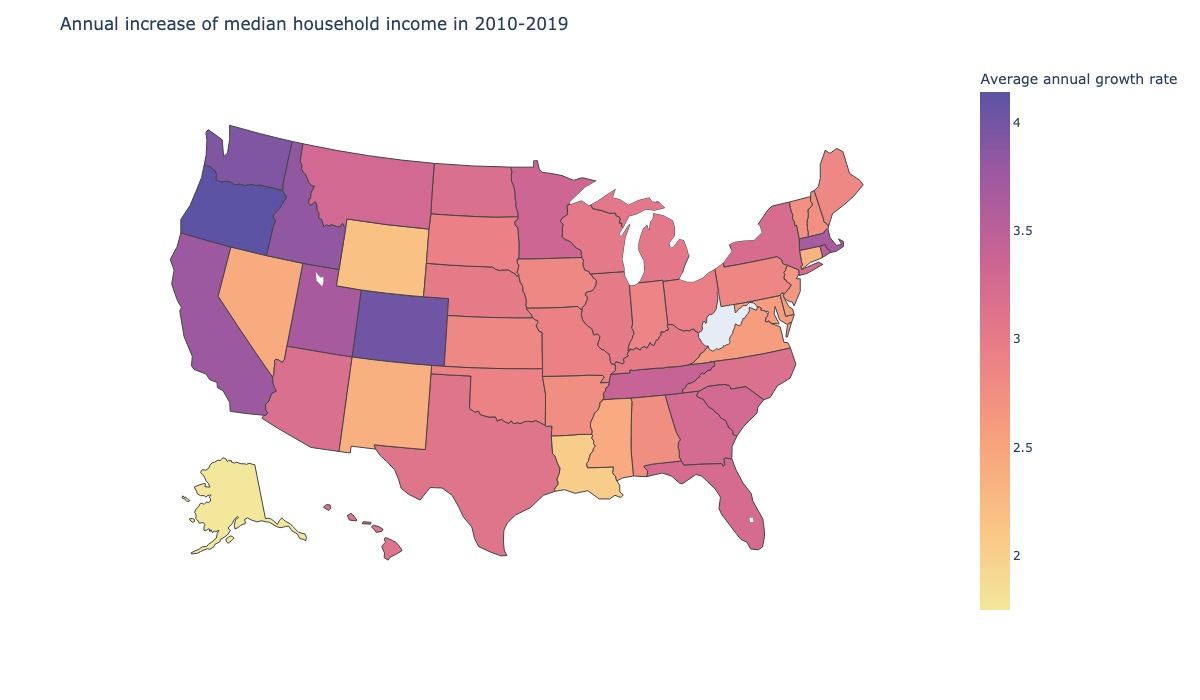

In [113]:
#2.5 and 2.6 Visualization and Interpretation
#1. Distribution of Average annual growth rate

df_new1['Average annual growth rate']=df_new1[
'Average annual growth rate'].str.strip("%").astype(float)

fig = px.choropleth(df_new1,  
                    locations="state_code",  
                    color="Average annual growth rate",  
                    hover_name="state_code", 
                    color_continuous_scale='Sunset', 
                    locationmode = 'USA-states') 
fig.update_layout(
title_text = 
'Annual increase of median household income in 2010-2019', 
geo_scope='usa')

image_bytes = fig.to_image(format='png', width=1200, height=700, 
                           scale=1)
from IPython.display import Image
Image(image_bytes)


By comparing the annual increase of median income in 2010 to 2019 in each state and viewing the distribution from the map above, we can get the five states that have most annual increase in income: Oregon, Colorado, Washington, Idaho, and California. Looking into the Macroeconomics "Solow Model", suppose income is a function of capital, employment, and technology(Y=F(Kt,AtKt), growth rate of income is determined by the growth rate of technology. Therefore, in this scenario, we can use the annual growth rate of median income to estimate the growth of technology in that state. The growth of household income and technology can be a good indicator for state's development, which might be a sign for startups to choose their location.

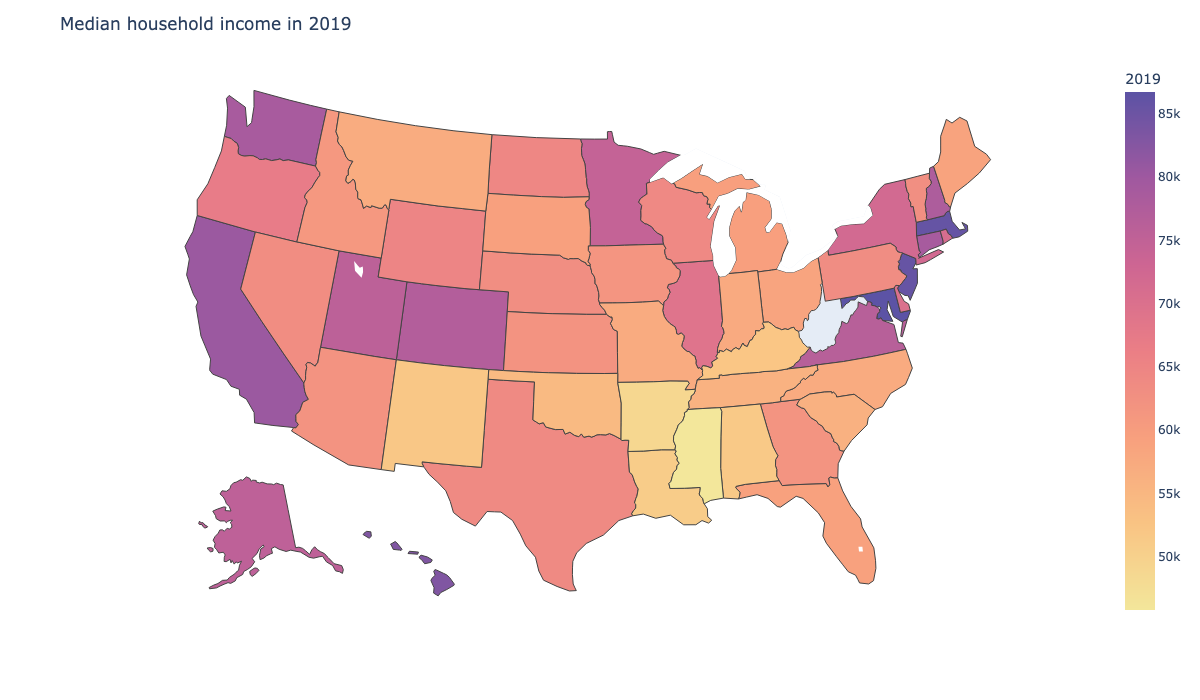

In [114]:
#2. Income 2019
df_new1['2019']=df_new1['2019'].str.strip("$").str.replace(',', 
                '').astype(float)

fig = px.choropleth(df_new1,  
                    locations="state_code",  
                    color="2019",  
                    hover_name="state_code", 
                    color_continuous_scale='Sunset', 
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'Median household income in 2019', 
    geo_scope='usa', )

image_bytes = fig.to_image(format='png', width=1200, 
                           height=700, scale=1)
from IPython.display import Image
Image(image_bytes)


To analyze on the most recent trend, we choose to map the median household income of 2019. In 2019, the top five states that have the highest median household income are Maryland, Massachusetts, New Jersey, Hawaii, and California. Since these five states are common as costal states, there might be a correlation between location and household income. And costal states tend to have higher household income because their locations allow for more net exports and international business. Also, Carlifornia is the only state within the top five states of highest annual growth rate from 2010 to 2019 and the top five states of highest median household income in 2019. In project 2, we found that california has most startups and receive the most total fundings among all the states. As a result, we can conclude that california is the best choice for startup firms to set up by looking into firms' funding and states' economic conditions.

# Part 3: OLS Regression 

3.1
    The dependent variables determined in part one are categories and operating status of startup firms. By definition, linear relationship describes a relation between two distinct variables x and y in the form of a straight line on a graph. For “category” variable, there are 42 startup categories. From the bar plot “Funding per sector”, we can see that software startups are the most in the market, with about 14.5 percent of the market. While “government” startups are the rarest in the market, with only 0.03 percent. However, since each category is independent categorical variable and total funding is a numerical variable depends on each category, there is no linear relations and not worthwhile to analyze on the linear relationship between the two variables. For “status” variable, there are 7 status in total. From bar plot of “Funding per status” we can see operating firms receive the most of funding, which is about 300 billion in total while firms with status of “alpha”, “beta”, “development”, “live”, and “private” receive very few fundings. Similarly, as the each status is independent categorical variable and total funding, we do not observe a relationship of straight line of two variables and there is no linear economic relationship between status and total funding. Rather, to further explore the relations between categorical and numeric variables, it is better to perform side-by-side boxplots and hypothesis testing.

3.2
    I choose 4 dependent variables: investment rounds, funding rounds, milestones, and relationships to be in the regressions because they can better explain the outcome variable total funding. Investment rounds refers to number of rounds the company invests other companies or equities. This is linked with total funding because more investment rounds require more investments and more funding. Funding rounds means rounds of funding that startups go through to raise capital, which provides outside investors the opportunity to invest in a company. It is directly related to total funding as the more funding rounds will increase total funding. Milestones are the significant moments of accomplishment that mark your company's development and growth. Number of milestones can refer to the development and reputation of a company and then affect total funding. Relations of a company are the connections that exist between the company and other institutions or firms. Number of relations also represent source of funding and determine total funding received. 

In [115]:
X = df.drop(["id","entity_type","entity_id","parent_id","name",
             "normalized_name","permalink",
            "founded_at","closed_at","domain","homepage_url",
             "twitter_username","logo_url",
             "logo_width","logo_height","short_description",
             "description","overview","tag_list",
             "country_code","state_code","city","region",
             "first_investment_at","last_investment_at",
             "invested_companies","first_funding_at",
             "last_funding_at","first_milestone_at",
             "last_milestone_at","created_by","created_at",
             "updated_at","category_code","status"], 
             axis=1).copy()
X= X.loc[~((X['funding_total_usd']==0)|
           (X['relationships'] == 0)|
           (X['milestones'] == 0)|
           (X['funding_rounds'] == 0)|
           (X['investment_rounds'] == 0))]
y = np.log(X["funding_total_usd"])
X["log_funding"] = y
X.head()

,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,log_funding
897,2,1,1.000000e+05,2,66,11.512925
1146,1,1,7.500000e+06,1,4,15.830414
1546,3,2,3.060000e+07,6,31,17.236511
2225,3,7,1.147288e+09,3,101,20.860667
2324,1,1,4.300000e+06,2,7,15.274126


# 3.3 and 3.4
# 1. regression of investment rounds
The first regression is a linear regression between investment rounds and total funding. It is assumed that there is a positive linear relation because the more investment rounds the company has, the more money it needs to have in order to invest other capitals, which required more total funding to support the company having the investment.

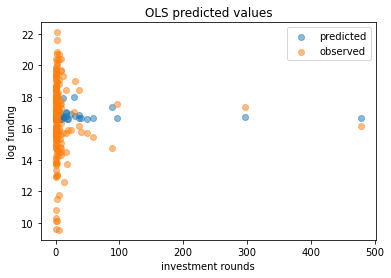

In [116]:
X_plot = X.dropna(subset=['log_funding', 'investment_rounds'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(X_plot['investment_rounds'], results.predict(), 
           alpha=0.5,
           label='predicted')

# Plot observed values

ax.scatter(X_plot['investment_rounds'], X_plot['log_funding'], 
           alpha=0.5,
           label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('investment rounds')
ax.set_ylabel('log fundng')
plt.show()

In [117]:
X['const'] = 1
reg1 = sm.OLS(endog=X['log_funding'], 
              exog=X[['const', 'investment_rounds']], \
    missing='drop')
type(reg1)

results = reg1.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_funding   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04382
Date:                Sat, 16 Apr 2022   Prob (F-statistic):              0.834
Time:                        23:34:53   Log-Likelihood:                -433.69
No. Observations:                 194   AIC:                             871.4
Df Residuals:                     192   BIC:                             877.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.6808      0.16

In [118]:
from sklearn import linear_model
# construct the model instance
funding_lr_model1 = linear_model.LinearRegression()

# fit the model
funding_lr_model1.fit(X[["investment_rounds"]], y)

# print the coefficients
beta_0 = funding_lr_model1.intercept_
beta_1 = funding_lr_model1.coef_[0]

print
(f"Fit model: log(total funding) = {beta_0:.4f} + {beta_1:.4f} investment rounds")

'Fit model: log(total funding) = 16.6808 + -0.0008 investment rounds'

From the regression $ \beta_0 $ is 16.6808, which refers to average of total funding when there are no investment rounds is 16.6808 billion (in log scale). The P-value of $ \beta_0 $ is zero, indicating the coefficient is statistically significant. 

$ \beta_1 $ is -0.0008, which refers to average change in total funding of per unit change of investment rounds is 0.0008 billion. The P-value of $ \beta_0 $ is 0.834, indicating the coefficient is not statistically significant. The Adjusted R Square is -0.005, which means explanation towards response is negligible. Therefore we can conclude that this model is not accurate and investment rounds have almost no linear relations with total funding.

# 2. regression of funding rounds
The second regression is assumed to be a linear regression between funding rounds and total funding. Funding rounds is supposed to be directly linked with total funding amounts since more funding rounds will result in more total funding.

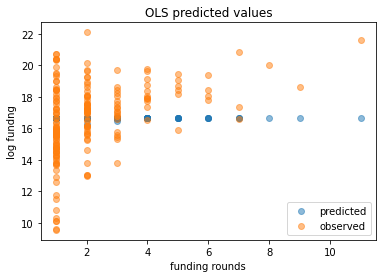

In [119]:
X_plot2 = X.dropna(subset=['log_funding', 'funding_rounds'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(X_plot2['funding_rounds'], results.predict(), 
           alpha=0.5,
           label='predicted')

# Plot observed values

ax.scatter(X_plot2['funding_rounds'], X_plot['log_funding'], 
           alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('funding rounds')
ax.set_ylabel('log fundng')
plt.show()

In [120]:
reg2 = sm.OLS(endog=X['log_funding'], 
              exog=X[['const', 'funding_rounds']], \
              missing='drop')
type(reg2)

results = reg2.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_funding   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     35.28
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.32e-08
Time:                        23:34:54   Log-Likelihood:                -417.35
No. Observations:                 194   AIC:                             838.7
Df Residuals:                     192   BIC:                             845.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.5154      0.246     63.

In [121]:
funding_lr_model2 = linear_model.LinearRegression()

# fit the model
funding_lr_model2.fit(X[["funding_rounds"]], y)

# print the coefficients
model2_beta_0 = funding_lr_model2.intercept_
model2_beta_1 = funding_lr_model2.coef_[0]

print
(f"Fit model: \
log(total funding) = {model2_beta_0:.4f} + {model2_beta_1:.4f} funding rounds")

'Fit model: log(total funding) = 15.5154 + 0.5466 funding rounds'

From the regression $ \beta_0 $ is 15.5154, which refers to average of total funding when there are no investment rounds is 15.5154 billion (log scale). The P-value of $ \beta_0 $ is zero, indicating the coefficient is statistically significant. 

$ \beta_1 $ is 0.5466, which refers to average change in total funding of per unit change of investment rounds is 0.5466 billion. The P-value of $ \beta_0 $ is also zero, indicating the coefficient is statistically significant. The Adjusted R Square is 0.151, which means around 15% of the variation can be explained through the regression. We can conclude that there is weak positive relations between funding rounds and total funding. However, this model is still uneffective because the Adjusted R Square is too low.

# 3. regression of milestones
The third regression is between number of milestones and total funding. This regression can also fit into a linear regression hypothetically because if the company has more milestones, it suggests better development and growth of the company, which builds good reputation. Therefore, more funding will be attracted which results in more total funding.

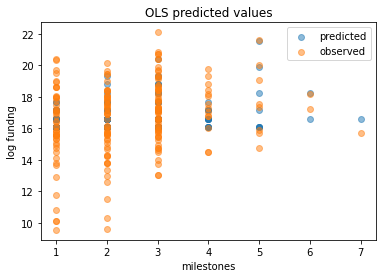

In [122]:
X_plot3 = X.dropna(subset=['log_funding', 'funding_rounds'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(X_plot3['milestones'], results.predict(), 
           alpha=0.5,
           label='predicted')

# Plot observed values

ax.scatter(X_plot3['milestones'], X_plot3['log_funding'], 
           alpha=0.5,
           label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('milestones')
ax.set_ylabel('log fundng')
plt.show()

In [123]:
reg3 = sm.OLS(endog=X['log_funding'], 
              exog=X[['const', 'milestones']], \
              missing='drop')
type(reg3)

results = reg3.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_funding   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.62
Date:                Sat, 16 Apr 2022   Prob (F-statistic):            0.00132
Time:                        23:34:54   Log-Likelihood:                -428.49
No. Observations:                 194   AIC:                             861.0
Df Residuals:                     192   BIC:                             867.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6000      0.366     42.658      0.0

In [124]:
funding_lr_model3 = linear_model.LinearRegression()

# fit the model
funding_lr_model3.fit(X[["milestones"]], y)

# print the coefficients
model3_beta_0 = funding_lr_model3.intercept_
model3_beta_1 = funding_lr_model3.coef_[0]

print(f"Fit model: log(total funding) = \
      {model3_beta_0:.4f} + {model3_beta_1:.4f} milestones")

Fit model: log(total funding) =       15.6000 + 0.4430 milestones


From the regression $ \beta_0 $ is 15.6000, which refers to average of total funding when there are no investment rounds is 15.6000 billion (log scale). The P-value of $ \beta_0 $ is zero, indicating the coefficient is statistically significant. 

$ \beta_1 $ is 0.4430, which refers to average change in total funding of per unit change of investment rounds is 0.4430 billion. The P-value of $ \beta_0 $ is around 0.001, indicating the coefficient is statistically significant we well. The Adjusted R Square is 0.047, which means around 5% of the variation can be explained through the regression. We can conclude that there is weak positive relations between numbder of milestones and total funding. However, this model is still uneffective because the Adjusted R Square is too small.

# 4.regression of relationships
The fourth regression depicts relation between relationships and total funding. If the company has more relationships or resources linked with other capital, it is likely they will have more funding opportunity, which raises its total funding. So there could exist a linear regression between relationships and total funding.

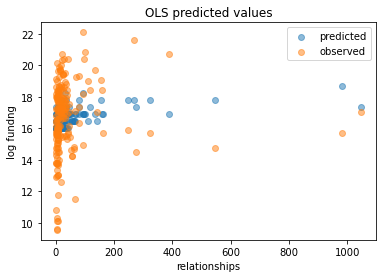

In [125]:
X_plot4 = X.dropna(subset=['log_funding', 
                           'relationships'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(X_plot4['relationships'], results.predict(), 
           alpha=0.5,
           label='predicted')

# Plot observed values

ax.scatter(X_plot4['relationships'], X_plot4['log_funding'], 
           alpha=0.5,
           label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('relationships')
ax.set_ylabel('log fundng')
plt.show()

In [126]:
reg4 = sm.OLS(endog=X['log_funding'], 
              exog=X[['const', 'relationships']], \
              missing='drop')
type(reg4)

results = reg4.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_funding   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9065
Date:                Sat, 16 Apr 2022   Prob (F-statistic):              0.342
Time:                        23:34:54   Log-Likelihood:                -433.25
No. Observations:                 194   AIC:                             870.5
Df Residuals:                     192   BIC:                             877.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.6159      0.174     95.648

In [127]:
funding_lr_model4 = linear_model.LinearRegression()

# fit the model
funding_lr_model4.fit(X[["relationships"]], y)

# print the coefficients
model4_beta_0 = funding_lr_model4.intercept_
model4_beta_1 = funding_lr_model4.coef_[0]

print(f"Fit model: log(total funding) = \
      {model4_beta_0:.4f} + {model4_beta_1:.4f} relationships")

Fit model: log(total funding) =       16.6159 + 0.0013 relationships


From the regression $ \beta_0 $ is 16.6159, which refers to average of total funding when there are no investment rounds is 16.6159 billion (in log scale). The P-value of $ \beta_0 $ is zero, indicating the coefficient is statistically significant. 

$ \beta_1 $ is 0.0013, which refers to average change in total funding of per unit change of investment rounds is 0.0013 billion. The P-value of $ \beta_0 $ is 0.342, indicating the coefficient is not statistically significant. The Adjusted R Square is zero, which means explanation towards response is none. Therefore we can conclude that this model is not accurate and relationships have almost no linear relations with total funding.

# 5. Multivariate Regression
The last regression is a multivariate regression that combines all factors from previous regressions. The reason for choosing this regression is multivariate regression helps to find a relationship between multiple variables that may have relations with outcome variables “total funding”. This regression will provide information about how significant the variables will affect outcome variable and it will be more thorough than a simple regression.

In [128]:
X['const'] = 1

# Create lists of variables to be used in each regression
X11 = ['const', 'investment_rounds']
X22 = ['const', 'investment_rounds','funding_rounds']
X33 = ['const', 'investment_rounds','funding_rounds','milestones']
X44 = ['const', 'investment_rounds','funding_rounds','milestones',
       'relationships']

# Estimate an OLS regression for each set of variables
reg11 = sm.OLS(X['log_funding'], X[X11], missing='drop').fit()
reg22 = sm.OLS(X['log_funding'], X[X22], missing='drop').fit()
reg33 = sm.OLS(X['log_funding'], X[X33], missing='drop').fit()
reg44 = sm.OLS(X['log_funding'], X[X44], missing='drop').fit()


In [129]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}",
           'AIC':lambda x: f"{x.aic:.2f}",
           'BIC':lambda x: f"{x.bic:.2f}"}

In [130]:
results_table = summary_col(results=[reg11,reg22,reg33,reg44],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'investment_rounds',
                                             'funding_rounds',
                                             'milestones',
                                             'relationships'])

#results_table.add_title('Table 2 - OLS Regressions')

print(results_table)


                  Model 1  Model 2  Model 3  Model 4 
-----------------------------------------------------
const             16.68*** 15.52*** 14.98*** 14.98***
                  (0.17)   (0.25)   (0.36)   (0.37)  
investment_rounds -0.00    -0.00    -0.00    -0.00   
                  (0.00)   (0.00)   (0.00)   (0.00)  
funding_rounds             0.55***  0.49***  0.49*** 
                           (0.09)   (0.09)   (0.10)  
milestones                          0.28**   0.28*   
                                    (0.13)   (0.15)  
relationships                                -0.00   
                                             (0.00)  
R-squared         0.00     0.16     0.17     0.17    
R-squared Adj.    -0.00    0.15     0.16     0.16    
R-squared         0.00     0.16     0.17     0.17    
No. observations  194      194      194      194     
AIC               871.38   840.63   838.37   840.37  
BIC               877.91   850.44   851.44   856.71  
Standard errors in parenthe

Fit model: 

log(total funding) = 14.98 - 0.00(investment rounds) + 0.49(funding rounds) + 0.28(milestones) -0.00(relationships)
                   
 = 14.98 + 0.49(funding rounds)+ 0.28(milestones)

In [131]:
X2=X.drop(["log_funding","const","funding_total_usd"], 
          axis=1).copy()

In [132]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X2, y)
y_pred_linear = lr_model.predict(X2)
from sklearn import metrics
full_mse = metrics.mean_squared_error(y, y_pred_linear)
print('Linear Model Mean Squared Error:', full_mse)

Linear Model Mean Squared Error: 4.23067903796863


3.5
    Comparing five regressions above, the multivariate regression is the best regression model because it combines variables in other four models and provides information about how significant the variables will affect outcome variable and it will be more thorough than a bivariate regression. 

3.6
    The regressions can be evaluated through Adjusted R Square, AIC, BIC, and P-value. 
    First, Adjusted R Square indicates how well the variables fit the regression line, adjusting for the number of predictions in a model. It suggests how much of variation in outcome variable is explained by X variable. 
    Second, AIC is a measure of whether the model is a good fit, and it only has meaning if we compare the AIC of different models. Lower AIC indicates a better-fitted model.
    Third, BIC is a criterion for model selection based on likelihood function. As likelihood increases, BIC decreases, so it is better to have low BIC.
    Lastly, P-value is the probability of observing test statistic as or more extreme than that actually observed if null hypothesis is true. If P-value is smaller than 0.05, then the statistics is statistically significant.
    By comparing all models, model 3 from multivariate regression is the best-fitted model to represent relations between X variables and outcome variables. P-values of all the parameter coefficients are smaller than 0.005, indicating the coefficients are statistically significant. The Adjusted R Squared for this regression is 0.17, which is the largest among all linear regressions. This means 17% of the variation of observations can be explained by this model. The BIC is the second smallest among all models, which is also an indicator of good model comparing to others. The full mean squared error of this model is approximately 4.23, which means the average squared difference between the observed and predicted values is approximately 4.23. 

   3.7
    From all the regressions above, we can see that the parameter coefficients of investment rounds and relationships are close to zero. The parameter coefficient of funding rounds is from 0.49 to 0.55 throughout all models, and parameter coefficient of milestones is from 0.28 to 0.44 throughout all models. Therefore, we can conclude investment rounds and relationships have almost have no impact on total funding. However, funding rounds and number of milestones have positive correlations with total funding and funding rounds has the biggest effect on total funding. Moreover, from the best-fitted regression specifically, we can get a predicted model of total funding based on funding rounds and milestones: 
                    log(total funding) = 14.98 + 0.49(funding rounds)+ 0.28(milestones)
    The interpretation of the model is that the average of total funding when there are no funding rounds and milestones is 14.98 billion. The average change in total funding for per unit change in funding rounds is 0.49 billion and average change in total funding for per unit change in milestones is 0.28 billion.

# Part 4: Machine Learning

We can also explore the non-linear relationship between the dependent variables and total funding by construcing a regression tree through machine learning. 

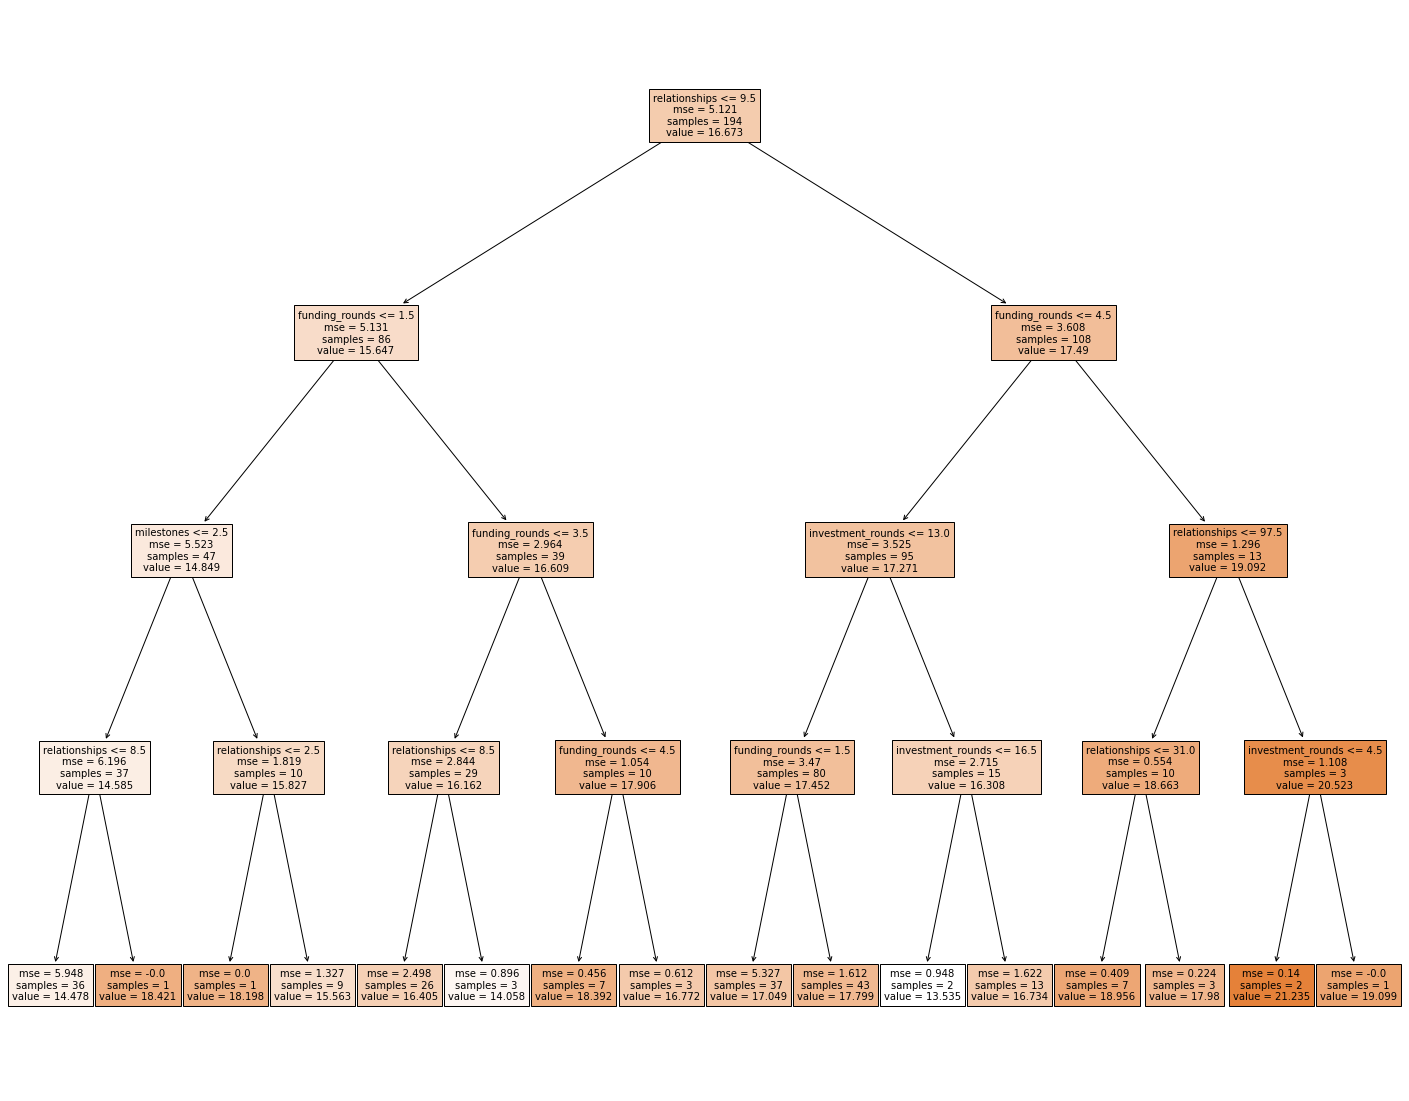

In [133]:
funding_fig = plt.figure(figsize=(25,20))
funding_fig = tree.plot_tree(funding_tree, 
                          feature_names=(X2.columns), 
                          filled=True,
                          fontsize=(10))

In [134]:
from sklearn import tree
funding_tree = tree.DecisionTreeRegressor(max_depth=4).fit(X2,y)
y_pred_tree = funding_tree.predict(X2)

# find the error of prediction (MSE)
from sklearn import metrics
print('Regression Tree Mean Squared Error:', 
      metrics.mean_squared_error(y, y_pred_tree))

Regression Tree Mean Squared Error: 3.0513287230322854


The objective function of the regression tree is
$$
\min_ \left[  \sum_{i=1}
    (y_i - \hat{y}_{i})^2 \right]
$$
where $y_i$ is actual total funding, $\hat{y}_{i}\$ is predicted total funding using regression tree, and N is number of observations.4.2
    

This is the loss function of the regression tree which evaluates the split based on the purity of the resulting nodes. We want to minimise this function because we want to minimise the least squared error to achieve smallest variance. Small variance indicates that predicted outcome (total funding) are close to the true mean outcome.

One regularization parameter of the regression tree is maximum depth. Maximum tree depth is a measure of maximum splits of a tree. By increasing maximum depth, the mean squared error can be reduced. However, when the depth of the tree is too large, the tree is too complicated to achieve sample prediction accuracy, which results in over-fitting.

Another regularization parameter is cost complexity parameter, ccp_alpha. This pruning parameter is different in different models. It controls the trade-off between complexity and quality of the fit to training data. The higher the alpha, the larger the
penalty for having a complex tree. As alpha increases, more of the tree is pruned, which results in a more accurate regression tree. However, when alpha is close to zero, the model is over-fitting.

We use mean squared error as an error prediction. The mean squared error is average squared difference between the estimated values and the actual value. It represents the amount of error in statistical models. The mean squared error of the regression tree is around 3.05, which is smaller than the mean squared error of the simple regression model 4.23. This indicates regression tree is more accurate than simple regression model.

By comparing linear regression and regression tree intuitively, the biggest difference is decision tree supports non linearity, where LR supports only linear solutions. In this scenario, when X variables have weak linear relations with outcome variable, regression tree is more accurate than linear regression and has less mean squared error. The regression tree model is easy to interpret as we can predict the total funding directly through the nodes without doing algebra. We can also see the mean squared error and number of observations in each node, which makes it easier for us to track the error of prediction. In addition, regression tree can better capture interactions between the four X variables while linear regression ignores the dependency between X variables.

# Conclusion 


We investigated distribution of total funding based on categorical variables: operating status, category, and US states. Operating firms receive the most of funding, which is about 300 billion in total while firms with status of “alpha”, “beta”, “development”, “live”, and “private” receive very few funding. “Ipo” and “Closed” firms are rank on third and fourth respectively although there are very few numbers of them. From category perspective, software startups are the most in the market, with about 14.5 percent of the market. In contrast, "government" startups are the rarest in the market, with only 0.03 percent. Biotech firms receive the most funding, with about 67 billion dollars, while Pets firms receive the least amount of funding. Technology industries such as including biotech, software, and clean tech received more funding compared to other types of firms. By analyzing on location, costal states generally contain more startups and receive more funding. California has most startups and receive the most total funding among all the states, which is 138 billion dollars. The five states that receive the most funding are California, New York, Massachusetts, Washington, and Texas.

We also use bivariate and multivariate linear regression models and machine learning as a prediction of total funding based on numerical variables.  Through the linear regression models, we can make a conclusion that funding rounds and number of milestones have positive correlations with total funding and funding rounds has the biggest effect on total funding. Investment rounds and number of relationships have almost no linear relations with total funding. The regression tree is also constructed to capture interactions between dependent variables and provided better classification of variables. Using mean squared error as an error prediction, regression tree has a better prediction on total funding due to smaller mean squared error.

However, the analysis of the project has certain limitations. First, dependent variables are not enough for predicting total funding for startup firms. It is worthwhile to explore other potential dependent variables such as funding time, firm’s size, and acquisitions and how these features interact with each other in the future. Second, regression models can be improved in the future to make more precise prediction on funding amounts. For instance, non-linear regression models and more advanced machine learning can be used to make prediction. In addition, except for total funding, there are other outcome variables worth to investigate such as profit and investment. These economic studies will provide important insights to the society and help the startups to grow. What is more, since the startups grow globally, observations can be extended in global scale. Not only look at US market, further study can also explore developing countries startup firms. Last but not the least, it will be meaningful to conduct further study on public's preference on working in startup firms and gather structured information about popular startup firms to provide career guide to the employees.  By improving on these limitations, economic investigation on startup firms will be more through and accurate to benefit the society as a whole.

# Reference:
Davila, A., Foster, G., & Gupta, M. (2003, April 1). Venture Capital Financing and the growth of startup firms. Journal of Business Venturing. Retrieved April 16, 2022, from https://www.sciencedirect.com/science/article/abs/pii/S0883902602001271 

The emergence of the lean global startup as a ... - tim review. (n.d.). Retrieved April 16, 2022, from https://timreview.ca/sites/default/files/article_PDF/RasmussenTanev_TIMReview_November2015.pdf 

Funding round meaning: Upcounsel 2022. UpCounsel. (n.d.). Retrieved April 16, 2022, from https://www.upcounsel.com/funding-round-meaning#:~:text=October%2028%2C%202020%3A-,The%20funding%20round%20meaning%20refers%20to%20the%20rounds%20of%20funding,growth%2C%20and%20proof%20of%20concept. 

Giving content to investor sentiment ... (n.d.). Retrieved April 16, 2022, from https://www0.gsb.columbia.edu/mygsb/faculty/research/pubfiles/3097/Tetlock_Media_Sentiment_JF.pdf 

Legacy, M. (2020, May 14). Company milestones: What they are & why they matter. Müllerhaus Legacy. Retrieved April 16, 2022, from https://mullerhauslegacy.com/blog/company-milestones-what-they-are-why-they-matter/#:~:text=By%20definition%2C%20company%20milestones%20are,your%20company's%20development%20and%20growth. 

Lowrey, Y. (2010, July 2). Startup business characteristics and dynamics: A data analysis of the Kauffman Firm Survey. SSRN. Retrieved April 16, 2022, from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1496545 

Pred present with BSTS - University of California, Berkeley. (n.d.). Retrieved April 16, 2022, from https://people.ischool.berkeley.edu/~hal/Papers/2013/pred-present-with-bsts.pdf 

Reiff, N. (2022, February 24). Series A, B, C funding: How it works. Investopedia. Retrieved April 16, 2022, from https://www.investopedia.com/articles/personal-finance/102015/series-b-c-funding-what-it-all-means-and-how-it-works.asp 

Vaidya, A. byP. J. R. byD., Johnson, A. byP., by, A., Johnson, P., Vaidya, R. byD., by, R., & Vaidya, D. (2022, March 28). Linear relationship. WallStreetMojo. Retrieved April 16, 2022, from https://www.wallstreetmojo.com/linear-relationship/ 

Varghese, D. (2019, May 10). Comparative study on classic machine learning algorithms. Medium. Retrieved April 16, 2022, from https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222 

What is bic, how do you use it and what is a good BIC value? JMP User Community. (2021, December 3). Retrieved April 16, 2022, from https://community.jmp.com/t5/Learning-Library
